In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
from sklearn.cluster import KMeans

(609, 551)


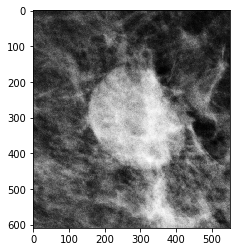

In [24]:
image = '/home/cot12/Documents/test-folder/abnormaility-cuts/client-1477-LMLO.jpg'
Beginning_image = cv2.imread(image,0)

q = Beginning_image.shape[0]
u = Beginning_image.shape[1]
beginning_image = Beginning_image
x1ml = 765 - 150
x2ml = 1016 + 150
z1ml = 948 - 150
z2ml = 1257 + 150
diffxml = x2ml - x1ml
diffzml = z2ml - z1ml

LMLOml = np.zeros((diffzml, diffxml))
for j in range(z1ml, z2ml):
    for k in range(x1ml, x2ml):
        LMLOml[j-z1ml,k-x1ml] = beginning_image[j,k]
        
plt.imshow(LMLOml, cmap = 'gray')
print(LMLOml.shape)
#cv2.imwrite('/home/cot12/Documents/test-folder/abnormaility-cuts/client-1034-LMLO-imagecrop.jpg',LMLOml)
#this just cuts out the abnomaility

(575, 586)


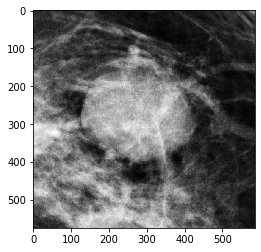

In [25]:
image = '/home/cot12/Documents/test-folder/abnormaility-cuts/client-1477-LCC.jpg'
Beginning_image = cv2.imread(image,0)

q = Beginning_image.shape[0]
u = Beginning_image.shape[1]
beginning_image = Beginning_image
x1cc = 460 - 150
x2cc = 746 + 150
y1cc = 727 - 150
y2cc = 1002 + 150
diffxcc = x2cc - x1cc
diffycc = y2cc - y1cc

LMLOcc = np.zeros((diffycc, diffxcc))
for j in range(y1cc, y2cc):
    for k in range(x1cc, x2cc):
        LMLOcc[j-y1cc,k-x1cc] = beginning_image[j,k]
        
plt.imshow(LMLOcc, cmap = 'gray')
print(LMLOcc.shape)
#cv2.imwrite('/home/cot12/Documents/test-folder/abnormaility-cuts/client-1034-LCC-imagecrop.jpg',LMLOcc)
#this just cuts out the abnomaility

[]

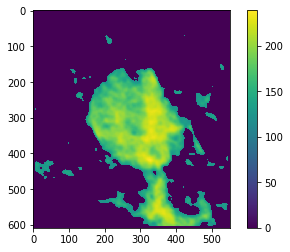

In [26]:

LMLO_density = np.zeros((diffzml, diffxml))
u = 5
for i in range(u, diffzml-u):
    for j in range(u, diffxml-u):
        
        lum = np.sum(LMLOml[i-u:i+u,j-u:j+u])/(len(LMLOml[i-u:i+u,j-u:j+u])**2)
        if lum >= 120:
            LMLO_density[i,j] = lum
        else:
            LMLO_density[i,j] = 0
plt.imshow(LMLO_density, cmap = 'gray')
plt.imshow(LMLO_density[:,:])
plt.colorbar()
plt.plot()

[]

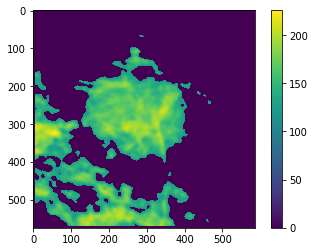

In [27]:

cc_density = np.zeros((diffycc, diffxcc))
u = 5
for i in range(u, diffycc-u):
    for j in range(u, diffxcc-u):
        
        lum = np.sum(LMLOcc[i-u:i+u,j-u:j+u])/(len(LMLOcc[i-u:i+u,j-u:j+u])**2)
        if lum >= 120:
            cc_density[i,j] = lum
        else:
            cc_density[i,j] = 0
plt.imshow(cc_density, cmap = 'gray')
plt.imshow(cc_density[:,:])
plt.colorbar()
plt.plot()


In [29]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(cc_density)